## 基本信息

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

In [2]:
# path to where the data lies
#dpath = './data/'
train_data = pd.read_csv("train.csv")
train_data.head()

,x,y,2.1G(10),2.1G(11),2.1G(12),2.1G(4),2.1G(7),2.1G(8),3.5G(10),3.5G(11),3.5G(12),3.5G(4),3.5G(7),3.5G(8)
0,0,89,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23
1,0,90,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-123.19,-126.23,-126.23
2,0,91,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-124.05,-126.23,-126.23
3,0,92,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-124.92,-126.23,-126.23
4,0,93,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-125.77,-126.23,-126.23


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25811 entries, 0 to 25810
Data columns (total 14 columns):
x            25811 non-null int64
 y           25811 non-null int64
 2.1G(10)    25811 non-null float64
 2.1G(11)    25811 non-null float64
 2.1G(12)    25811 non-null float64
 2.1G(4)     25811 non-null float64
 2.1G(7)     25811 non-null float64
 2.1G(8)     25811 non-null float64
 3.5G(10)    25811 non-null float64
 3.5G(11)    25811 non-null float64
 3.5G(12)    25811 non-null float64
 3.5G(4)     25811 non-null float64
 3.5G(7)     25811 non-null float64
 3.5G(8)     25811 non-null float64
dtypes: float64(12), int64(2)
memory usage: 2.8 MB


In [4]:
# 判断数据是否有空
train_data.isnull().sum()

x            0
 y           0
 2.1G(10)    0
 2.1G(11)    0
 2.1G(12)    0
 2.1G(4)     0
 2.1G(7)     0
 2.1G(8)     0
 3.5G(10)    0
 3.5G(11)    0
 3.5G(12)    0
 3.5G(4)     0
 3.5G(7)     0
 3.5G(8)     0
dtype: int64

In [5]:
## 各属性的统计特性
train_data.describe()

,x,y,2.1G(10),2.1G(11),2.1G(12),2.1G(4),2.1G(7),2.1G(8),3.5G(10),3.5G(11),3.5G(12),3.5G(4),3.5G(7),3.5G(8)
count,25811.000000,25811.00000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000
mean,163.681570,67.81752,-108.514127,-110.319527,-108.429769,-113.919070,-111.130266,-115.278602,-110.703393,-111.831349,-110.229334,-116.053418,-114.473973,-117.743432
std,98.400582,40.49610,22.781435,21.828645,20.995701,16.799755,17.442046,17.070073,21.891570,21.116508,20.403680,14.755977,16.940765,14.543601
min,0.000000,0.00000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000
25%,68.000000,35.00000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000
50%,181.000000,65.00000,-126.230000,-126.230000,-121.580000,-126.230000,-117.570000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000
75%,252.000000,99.00000,-85.190000,-90.545000,-91.030000,-103.830000,-97.320000,-107.935000,-90.715000,-96.420000,-94.310000,-106.910000,-101.755000,-112.515000
max,317.000000,156.00000,-54.140000,-54.320000,-54.160000,-67.390000,-67.410000,-67.430000,-53.700000,-53.710000,-53.690000,-74.830000,-68.550000,-74.790000


## 数据分布相关性探索

In [16]:
train_data.columns[4]

' 2.1G(12)'

Text(0.5, 1.0, 'Histogram of Residuals')

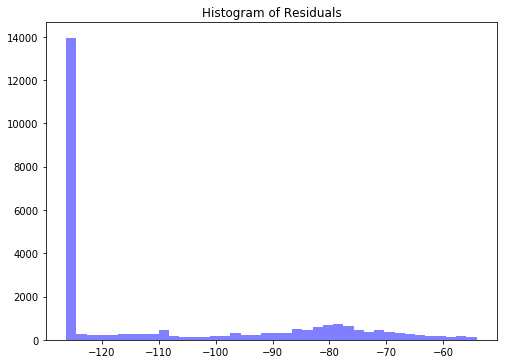

In [42]:
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(train_data[' 2.1G(10)'].values,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 

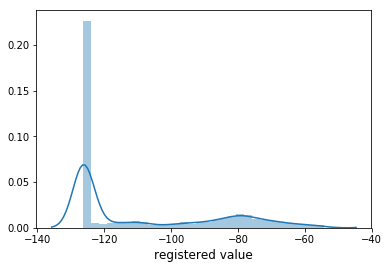

In [24]:
fig = plt.figure()
sns.distplot(train_data[' 2.1G(10)'].values, bins=30, kde=True)
plt.xlabel('registered value',fontsize = 12)
plt.show()

In [45]:
fig, axes = plt.subplots(1,2,3,4,5,6,7,8 ,figsize=(7, 5))
fig.tight_layout()

for column_index, ax in enumerate(axes):
    column = train_data.columns[column_index + 2]    
    axes.hist(train_data[column].values,bins=40, label='Residuals Linear', color='b', alpha=.5); 
    ax.set_title("频率分布图")

plt.show()
    

TypeError: subplots() takes from 0 to 7 positional arguments but 8 were given